In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 MB 35.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.5-py2.py3-none-any.whl size=317747859 sha256=4faea110be7e8cf3986cbb9a3534e2502a40d7fc786c6ce5c7f6275d185b43b7
  Stored in directory: /Users/debikachoudhury/Library/Caches/pip/wheels/8f/cb/c0/cc57eb1bf0f9dc87cdaf2b0dbac49e58a210ff68d21d6fc709
Successfully built pyspark

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [67]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, desc, concat_ws

In [69]:
spark = SparkSession.builder \
    .appName("Flight Delay Analysis") \
    .getOrCreate()

In [71]:
file_path = "/Users/debikachoudhury/Desktop/Debika/SJSU_Classes/2nd_Sem/Data228_BigData/Group_Project/Data_Analysis_Debika/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2023_11.csv"

In [73]:
df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

In [75]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- FlightDate: date (nullable = true)
 |-- Reporting_Airline: string (nullable = true)
 |-- DOT_ID_Reporting_Airline: integer (nullable = true)
 |-- IATA_CODE_Reporting_Airline: string (nullable = true)
 |-- Tail_Number: string (nullable = true)
 |-- Flight_Number_Reporting_Airline: integer (nullable = true)
 |-- OriginAirportID: integer (nullable = true)
 |-- OriginAirportSeqID: integer (nullable = true)
 |-- OriginCityMarketID: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- OriginState: string (nullable = true)
 |-- OriginStateFips: integer (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- OriginWac: integer (nullable = true)
 |-- DestAirportID: integer (nullable = true)
 |-- DestAirportSeqID: 

In [81]:
df.limit(5).toPandas()

25/05/09 16:53:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Year, Quarter, Month, DayofMonth, DayOfWeek, FlightDate, Reporting_Airline, DOT_ID_Reporting_Airline, IATA_CODE_Reporting_Airline, Tail_Number, Flight_Number_Reporting_Airline, OriginAirportID, OriginAirportSeqID, OriginCityMarketID, Origin, OriginCityName, OriginState, OriginStateFips, OriginStateName, OriginWac, DestAirportID, DestAirportSeqID, DestCityMarketID, Dest, DestCityName, DestState, DestStateFips, DestStateName, DestWac, CRSDepTime, DepTime, DepDelay, DepDelayMinutes, DepDel15, DepartureDelayGroups, DepTimeBlk, TaxiOut, WheelsOff, WheelsOn, TaxiIn, CRSArrTime, ArrTime, ArrDelay, ArrDelayMinutes, ArrDel15, ArrivalDelayGroups, ArrTimeBlk, Cancelled, CancellationCode, Diverted, CRSElapsedTime, ActualElapsedTime, AirTime, Flights, Distance, DistanceGroup, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, FirstDepTime, TotalAddGTime, LongestAddGTime, DivAirportLandi

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,_c109
0,2023,4,11,1,3,2023-11-01,9E,20363,9E,N935XJ,...,None,None,None,None,None,None,None,None,None,None
1,2023,4,11,2,4,2023-11-02,9E,20363,9E,N937XJ,...,None,None,None,None,None,None,None,None,None,None
2,2023,4,11,3,5,2023-11-03,9E,20363,9E,N184GJ,...,None,None,None,None,None,None,None,None,None,None
3,2023,4,11,5,7,2023-11-05,9E,20363,9E,N320PQ,...,None,None,None,None,None,None,None,None,None,None
4,2023,4,11,6,1,2023-11-06,9E,20363,9E,N348PQ,...,None,None,None,None,None,None,None,None,None,None


In [85]:
num_cols = 5

# Get the full column list
all_columns = df.columns

# Slice first and last few columns
selected_columns = list(all_columns[:num_cols]) + list(all_columns[-num_cols:])

# Display limited columns
df[selected_columns]

DataFrame[Year: int, Quarter: int, Month: int, DayofMonth: int, DayOfWeek: int, Div5TotalGTime: string, Div5LongestGTime: string, Div5WheelsOff: string, Div5TailNum: string, _c109: string]

In [89]:
# Convert first 5 rows of `df` to pandas
df_sample = df.limit(5).toPandas()

# Set how many columns you want from the start and end
num_start_cols = 6  # first N columns
num_end_cols = 6    # last N columns

# Get all column names
all_cols = df_sample.columns

# Combine first and last column names
selected_cols = list(all_cols[:num_start_cols]) + list(all_cols[-num_end_cols:])

# Display subset of the dataframe
df_sample[selected_cols]


25/05/09 17:05:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Year, Quarter, Month, DayofMonth, DayOfWeek, FlightDate, Reporting_Airline, DOT_ID_Reporting_Airline, IATA_CODE_Reporting_Airline, Tail_Number, Flight_Number_Reporting_Airline, OriginAirportID, OriginAirportSeqID, OriginCityMarketID, Origin, OriginCityName, OriginState, OriginStateFips, OriginStateName, OriginWac, DestAirportID, DestAirportSeqID, DestCityMarketID, Dest, DestCityName, DestState, DestStateFips, DestStateName, DestWac, CRSDepTime, DepTime, DepDelay, DepDelayMinutes, DepDel15, DepartureDelayGroups, DepTimeBlk, TaxiOut, WheelsOff, WheelsOn, TaxiIn, CRSArrTime, ArrTime, ArrDelay, ArrDelayMinutes, ArrDel15, ArrivalDelayGroups, ArrTimeBlk, Cancelled, CancellationCode, Diverted, CRSElapsedTime, ActualElapsedTime, AirTime, Flights, Distance, DistanceGroup, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, FirstDepTime, TotalAddGTime, LongestAddGTime, DivAirportLandi

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,_c109
0,2023,4,11,1,3,2023-11-01,None,None,None,None,None,None
1,2023,4,11,2,4,2023-11-02,None,None,None,None,None,None
2,2023,4,11,3,5,2023-11-03,None,None,None,None,None,None
3,2023,4,11,5,7,2023-11-05,None,None,None,None,None,None
4,2023,4,11,6,1,2023-11-06,None,None,None,None,None,None


In [91]:
# Get total number of rows and columns in the Spark DataFrame
row_count = df.count()
col_count = len(df.columns)
print(f"✅ The dataset contains {row_count} rows and {col_count} columns.")

# Convert first 5 rows to Pandas
df_sample = df.limit(5).toPandas()

# Display only first 4 and last 4 columns
num_start_cols = 4
num_end_cols = 4
all_cols = df_sample.columns
selected_cols = list(all_cols[:num_start_cols]) + list(all_cols[-num_end_cols:])

# Show the subset DataFrame
df_sample[selected_cols]


✅ The dataset contains 563777 rows and 110 columns.


25/05/09 17:06:36 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Year, Quarter, Month, DayofMonth, DayOfWeek, FlightDate, Reporting_Airline, DOT_ID_Reporting_Airline, IATA_CODE_Reporting_Airline, Tail_Number, Flight_Number_Reporting_Airline, OriginAirportID, OriginAirportSeqID, OriginCityMarketID, Origin, OriginCityName, OriginState, OriginStateFips, OriginStateName, OriginWac, DestAirportID, DestAirportSeqID, DestCityMarketID, Dest, DestCityName, DestState, DestStateFips, DestStateName, DestWac, CRSDepTime, DepTime, DepDelay, DepDelayMinutes, DepDel15, DepartureDelayGroups, DepTimeBlk, TaxiOut, WheelsOff, WheelsOn, TaxiIn, CRSArrTime, ArrTime, ArrDelay, ArrDelayMinutes, ArrDel15, ArrivalDelayGroups, ArrTimeBlk, Cancelled, CancellationCode, Diverted, CRSElapsedTime, ActualElapsedTime, AirTime, Flights, Distance, DistanceGroup, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, FirstDepTime, TotalAddGTime, LongestAddGTime, DivAirportLandi

,Year,Quarter,Month,DayofMonth,Div5LongestGTime,Div5WheelsOff,Div5TailNum,_c109
0,2023,4,11,1,None,None,None,None
1,2023,4,11,2,None,None,None,None
2,2023,4,11,3,None,None,None,None
3,2023,4,11,5,None,None,None,None
4,2023,4,11,6,None,None,None,None


In [19]:
df.columns

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityD

In [21]:
df = df.select(
    "FlightDate",
    "Origin",
    "Dest",
    "Reporting_Airline",
    "DepDelay",
    "ArrDelay",
    "Cancelled",
    "Diverted"
)


In [25]:
from pyspark.sql.functions import col


In [27]:
df = df.select(
    col("FlightDate").alias("FL_DATE"),
    col("Origin").alias("ORIGIN"),
    col("Dest").alias("DEST"),
    col("Reporting_Airline").alias("CARRIER"),
    col("DepDelay").alias("DEP_DELAY"),
    col("ArrDelay").alias("ARR_DELAY"),
    col("Cancelled").alias("CANCELLED"),
    col("Diverted").alias("DIVERTED")
)

In [29]:
df = df.withColumn("ROUTE", concat_ws("-", df["ORIGIN"], df["DEST"]))

In [31]:
airport_delays = df.groupBy("ORIGIN") \
    .agg(
        avg("DEP_DELAY").alias("Avg_Dep_Delay"),
        avg("ARR_DELAY").alias("Avg_Arr_Delay")
    ) \
    .orderBy(desc("Avg_Dep_Delay"))

print("📍 Top 10 Delay-Prone Airports:")
airport_delays.show(10)

📍 Top 10 Delay-Prone Airports:


+------+------------------+------------------+
|ORIGIN|     Avg_Dep_Delay|     Avg_Arr_Delay|
+------+------------------+------------------+
|   USA| 72.46774193548387|  69.3225806451613|
|   HTS| 50.56521739130435|46.391304347826086|
|   BPT| 38.44444444444444|31.977777777777778|
|   FSM| 38.04705882352941|35.642857142857146|
|   CYS|36.872727272727275|28.763636363636362|
|   CIU| 34.45762711864407| 24.52542372881356|
|   SAF|34.054263565891475|33.736434108527135|
|   VCT|27.647058823529413|15.235294117647058|
|   XWA|25.723880597014926|16.104477611940297|
|   PSM|              23.5|             14.55|
+------+------------------+------------------+
only showing top 10 rows



In [33]:
route_delays = df.groupBy("ROUTE") \
    .agg(
        avg("DEP_DELAY").alias("Avg_Dep_Delay"),
        avg("ARR_DELAY").alias("Avg_Arr_Delay")
    ) \
    .orderBy(desc("Avg_Dep_Delay"))

print("🛫 Top 10 Delay-Prone Routes:")
route_delays.show(10)

🛫 Top 10 Delay-Prone Routes:


+-------+------------------+-------------------+
|  ROUTE|     Avg_Dep_Delay|      Avg_Arr_Delay|
+-------+------------------+-------------------+
|AUS-SAF|            1321.0|             1319.0|
|SAF-AUS|             562.0|              550.0|
|MIA-ICT| 278.3333333333333|  296.6666666666667|
|LAS-LGA|            251.25|-29.333333333333332|
|TPA-GRR|            230.25|              211.5|
|GRR-TPA|             210.0|              214.5|
|SJU-CLE|             200.0|            218.875|
|PSP-BLI|137.63636363636363|  127.9090909090909|
|USA-FLL|134.89473684210526| 136.73684210526315|
|FWA-SFB|107.81818181818181| 100.27272727272727|
+-------+------------------+-------------------+
only showing top 10 rows



In [35]:
airline_perf = df.groupBy("CARRIER") \
    .agg(
        avg("DEP_DELAY").alias("Avg_Dep_Delay"),
        avg("ARR_DELAY").alias("Avg_Arr_Delay"),
        avg("CANCELLED").alias("Cancellation_Rate"),
        avg("DIVERTED").alias("Diversion_Rate")
    ) \
    .orderBy("Avg_Dep_Delay")

print("✈️ Airline On-Time Performance:")
airline_perf.show(10)

✈️ Airline On-Time Performance:


+-------+------------------+-------------------+--------------------+--------------------+
|CARRIER|     Avg_Dep_Delay|      Avg_Arr_Delay|   Cancellation_Rate|      Diversion_Rate|
+-------+------------------+-------------------+--------------------+--------------------+
|     YX|-2.754681818181818|-11.180660420267444| 9.09008271975275E-5|6.363057903826924E-4|
|     9E|0.6739117162219915| -9.910101380236961|                 0.0|3.052689419378472...|
|     DL|2.6611321318331176| -6.495017314830962| 1.36895946635471E-4|7.964855076972857E-4|
|     UA|  3.34003526727059| -4.717625681405209|0.001053595177643...|8.808746567179646E-4|
|     AS|3.6428310645178117| -1.063575951022971|0.004466372370812776|0.003012204622176058|
|     OH|3.9504901352525126|-1.9329855288491398|0.001981424148606811|0.001052631578947...|
|     HA|4.4504573170731705| 3.9596946564885496|0.009666213562905906|0.001057242108442...|
|     MQ| 4.842680077212232| -0.084837086362019|0.002179532667646...|6.589284809164175E-4|

In [39]:
from pyspark.sql.functions import to_date

In [41]:
df = df.withColumn("FL_DATE", to_date("FL_DATE"))  # Convert to proper date type

daily_trend = df.groupBy("FL_DATE") \
    .agg(
        avg("DEP_DELAY").alias("Avg_Dep_Delay"),
        avg("ARR_DELAY").alias("Avg_Arr_Delay")
    ) \
    .orderBy("FL_DATE")

print("📆 Daily Average Delays:")
daily_trend.show(10)


📆 Daily Average Delays:


+----------+------------------+--------------------+
|   FL_DATE|     Avg_Dep_Delay|       Avg_Arr_Delay|
+----------+------------------+--------------------+
|2023-11-01|5.2269318552331265|  -1.017895996518712|
|2023-11-02| 5.056693470894654|  -1.177637237541108|
|2023-11-03| 5.682691820072011| -1.5923990257763345|
|2023-11-04| 3.478120901395016|  -4.598256924546323|
|2023-11-05| 6.388673390224981| -2.3855434163516804|
|2023-11-06| 4.888241256969082|  -3.273783550662134|
|2023-11-07| 0.979215029962749|  -7.671673240045384|
|2023-11-08| 1.944940396642968|  -6.323359383363665|
|2023-11-09| 6.816529008863819|-0.19607843137254902|
|2023-11-10| 4.726679481991097|  -2.266818526955201|
+----------+------------------+--------------------+
only showing top 10 rows



In [45]:
from pyspark.sql.functions import dayofweek

In [47]:
df = df.withColumn("DayOfWeek", dayofweek("FL_DATE"))  # 1=Sunday, 7=Saturday

weekday_delay = df.groupBy("DayOfWeek") \
    .agg(
        avg("DEP_DELAY").alias("Avg_Dep_Delay"),
        avg("ARR_DELAY").alias("Avg_Arr_Delay")
    ) \
    .orderBy("DayOfWeek")

print("📅 Delay by Day of Week:")
weekday_delay.show()

📅 Delay by Day of Week:


+---------+-----------------+--------------------+
|DayOfWeek|    Avg_Dep_Delay|       Avg_Arr_Delay|
+---------+-----------------+--------------------+
|        1|9.353741410670978|  3.1198355991147646|
|        2|6.799362174154187|-0.13792146174035938|
|        3|5.536743699451426|  -1.637865055387714|
|        4|4.135481457732179| -3.2771897907860237|
|        5|4.795348164948912| -2.3938406079284373|
|        6|5.405099224258598| -1.7560847877034262|
|        7|5.468623192547294| -2.3579786016706716|
+---------+-----------------+--------------------+



In [49]:
worst_arrival_routes = df.groupBy("ROUTE") \
    .agg(
        avg("ARR_DELAY").alias("Avg_Arrival_Delay")
    ) \
    .orderBy(desc("Avg_Arrival_Delay"))

print("❌ Worst Routes by Arrival Delay:")
worst_arrival_routes.show(10)

❌ Worst Routes by Arrival Delay:


+-------+------------------+
|  ROUTE| Avg_Arrival_Delay|
+-------+------------------+
|AUS-SAF|            1319.0|
|SAF-AUS|             550.0|
|MIA-ICT| 296.6666666666667|
|SJU-CLE|           218.875|
|GRR-TPA|             214.5|
|TPA-GRR|             211.5|
|USA-FLL|136.73684210526315|
|PSP-BLI| 127.9090909090909|
|HTS-SFB| 101.9090909090909|
|FWA-SFB|100.27272727272727|
+-------+------------------+
only showing top 10 rows



In [51]:
top_cancelled_airlines = df.groupBy("CARRIER") \
    .agg(
        avg("CANCELLED").alias("Cancellation_Rate")
    ) \
    .orderBy(desc("Cancellation_Rate"))

print("🛑 Airlines with Highest Cancellation Rate:")
top_cancelled_airlines.show(10)


🛑 Airlines with Highest Cancellation Rate:


+-------+--------------------+
|CARRIER|   Cancellation_Rate|
+-------+--------------------+
|     HA|0.009666213562905906|
|     AS|0.004466372370812776|
|     NK|0.003626316698324987|
|     MQ|0.002179532667646...|
|     OO|0.002063153477637...|
|     WN|0.001991820474934...|
|     OH|0.001981424148606811|
|     F9|0.001509054325955...|
|     B6|0.001503688736431...|
|     UA|0.001053595177643...|
+-------+--------------------+
only showing top 10 rows



In [55]:
import matplotlib.pyplot as plt
import pandas as pd

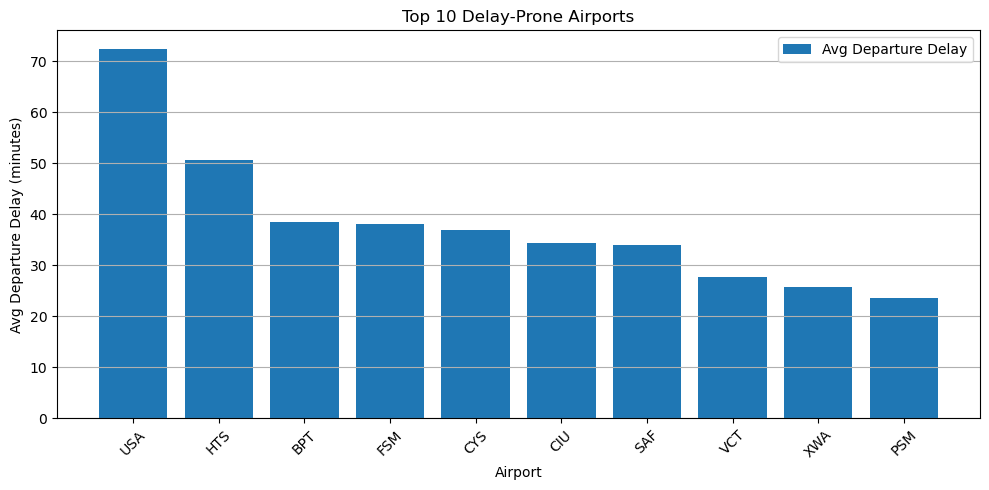

In [57]:
airport_delays_pd = airport_delays.limit(10).toPandas()

plt.figure(figsize=(10, 5))
plt.bar(airport_delays_pd["ORIGIN"], airport_delays_pd["Avg_Dep_Delay"], label='Avg Departure Delay')
plt.title("Top 10 Delay-Prone Airports")
plt.xlabel("Airport")
plt.ylabel("Avg Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.legend()
plt.show()

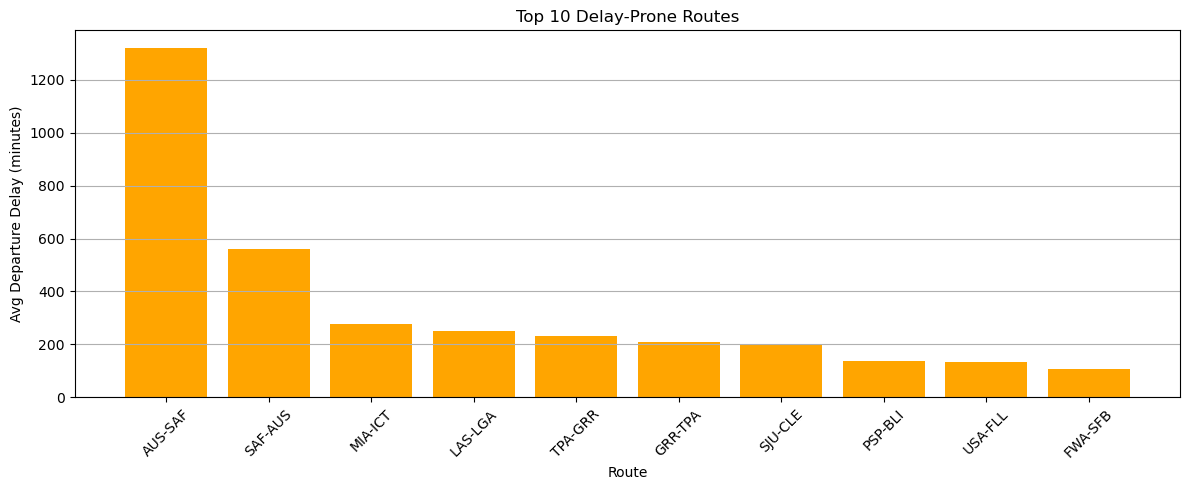

In [59]:
route_delays_pd = route_delays.limit(10).toPandas()

plt.figure(figsize=(12, 5))
plt.bar(route_delays_pd["ROUTE"], route_delays_pd["Avg_Dep_Delay"], color='orange')
plt.title("Top 10 Delay-Prone Routes")
plt.xlabel("Route")
plt.ylabel("Avg Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

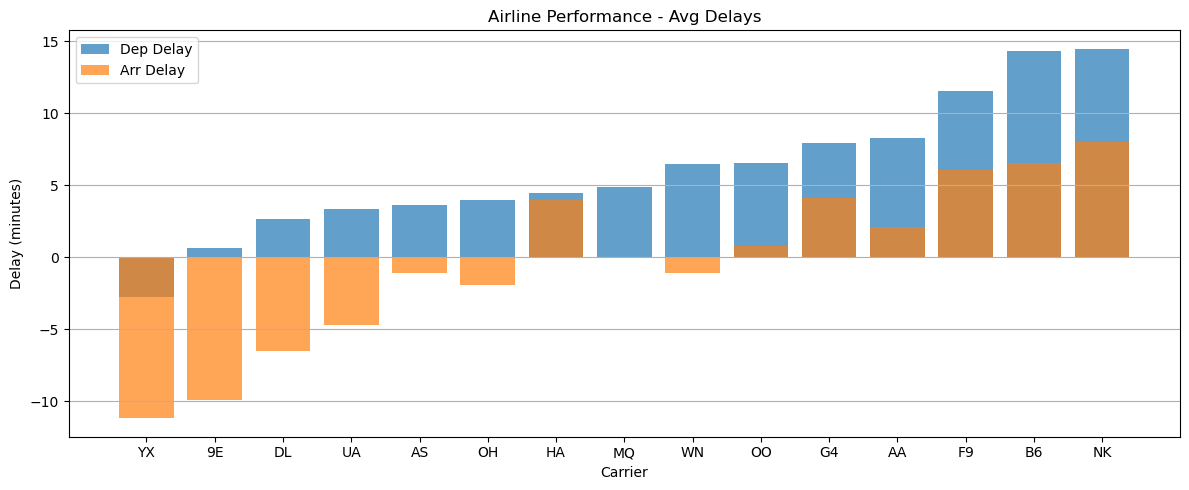

In [61]:
airline_perf_pd = airline_perf.toPandas()

plt.figure(figsize=(12, 5))
plt.bar(airline_perf_pd["CARRIER"], airline_perf_pd["Avg_Dep_Delay"], label="Dep Delay", alpha=0.7)
plt.bar(airline_perf_pd["CARRIER"], airline_perf_pd["Avg_Arr_Delay"], label="Arr Delay", alpha=0.7)
plt.title("Airline Performance - Avg Delays")
plt.xlabel("Carrier")
plt.ylabel("Delay (minutes)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

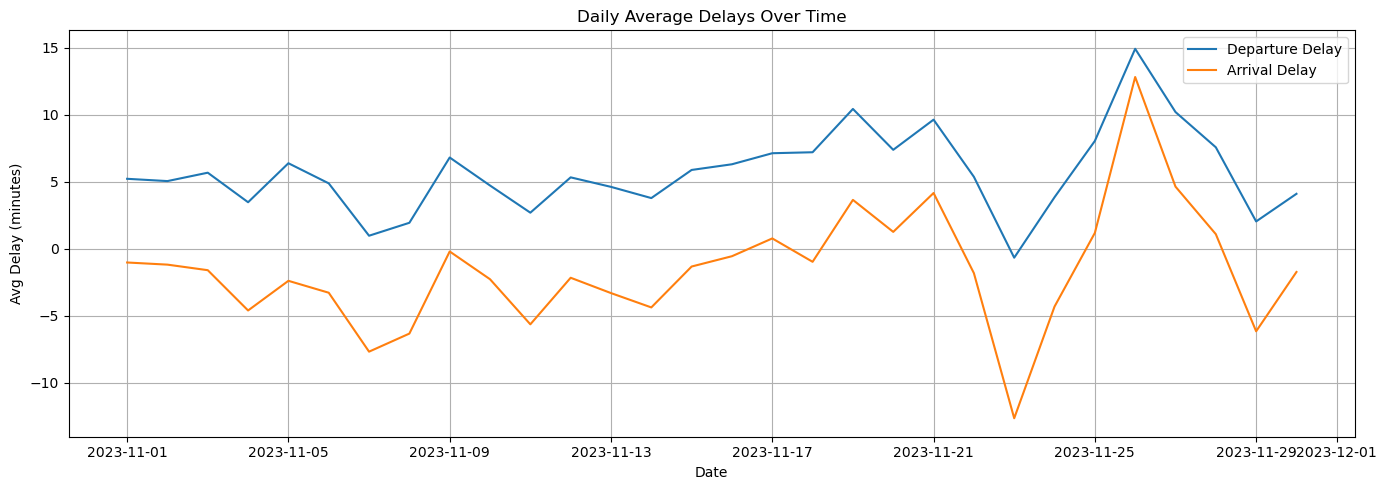

In [63]:
daily_trend_pd = daily_trend.toPandas()

plt.figure(figsize=(14, 5))
plt.plot(daily_trend_pd["FL_DATE"], daily_trend_pd["Avg_Dep_Delay"], label="Departure Delay")
plt.plot(daily_trend_pd["FL_DATE"], daily_trend_pd["Avg_Arr_Delay"], label="Arrival Delay")
plt.title("Daily Average Delays Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Delay (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

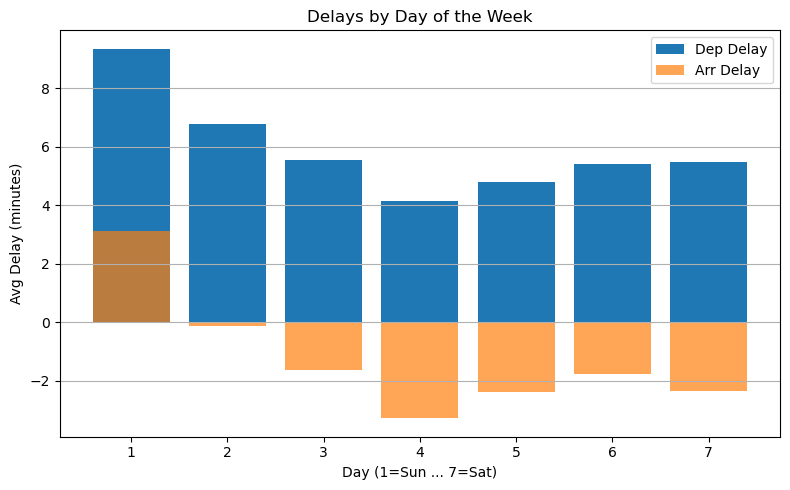

In [65]:
weekday_delay_pd = weekday_delay.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(weekday_delay_pd["DayOfWeek"], weekday_delay_pd["Avg_Dep_Delay"], label="Dep Delay")
plt.bar(weekday_delay_pd["DayOfWeek"], weekday_delay_pd["Avg_Arr_Delay"], label="Arr Delay", alpha=0.7)
plt.title("Delays by Day of the Week")
plt.xlabel("Day (1=Sun ... 7=Sat)")
plt.ylabel("Avg Delay (minutes)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

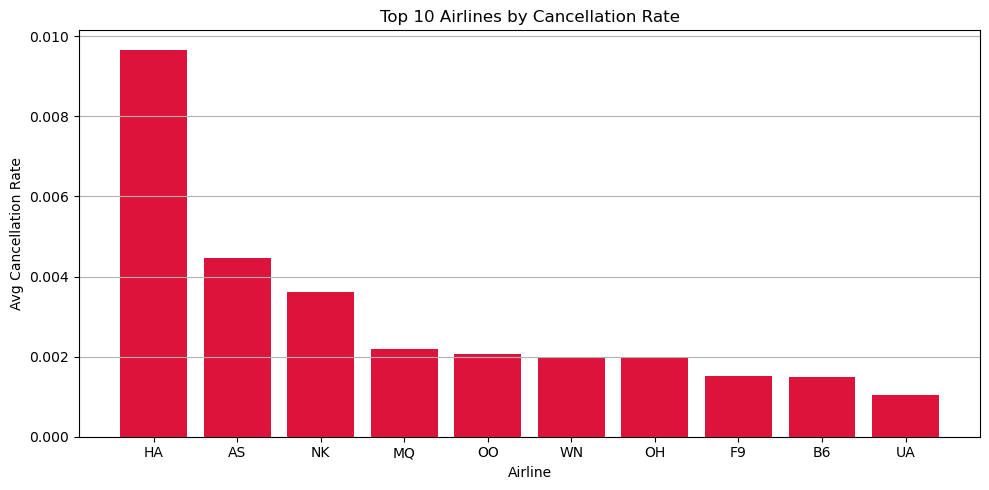

In [93]:
top_cancelled_airlines_pd = top_cancelled_airlines.limit(10).toPandas()

plt.figure(figsize=(10, 5))
plt.bar(top_cancelled_airlines_pd["CARRIER"], top_cancelled_airlines_pd["Cancellation_Rate"], color='crimson')
plt.title("Top 10 Airlines by Cancellation Rate")
plt.xlabel("Airline")
plt.ylabel("Avg Cancellation Rate")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

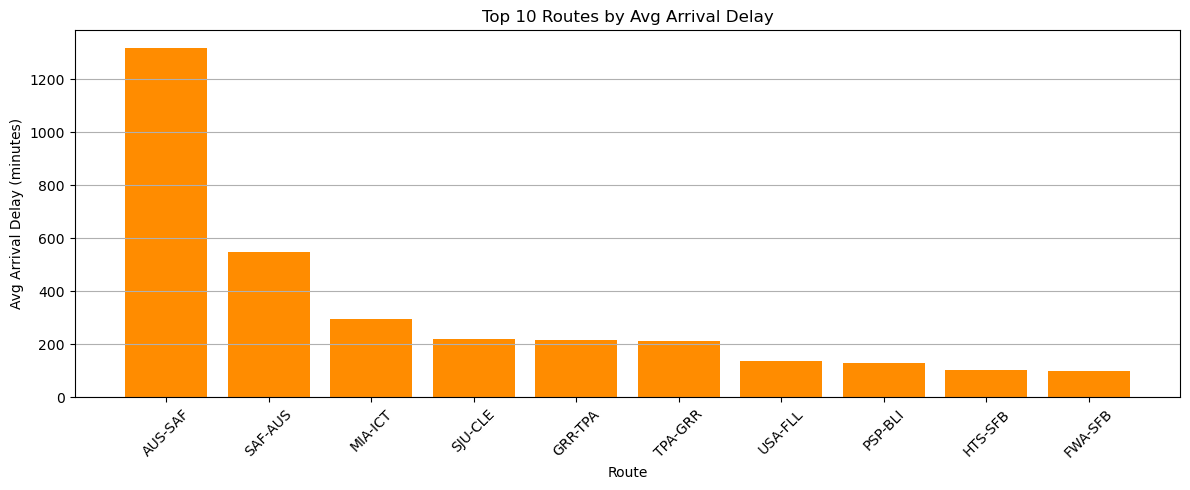

In [95]:
worst_routes_pd = worst_arrival_routes.limit(10).toPandas()

plt.figure(figsize=(12, 5))
plt.bar(worst_routes_pd["ROUTE"], worst_routes_pd["Avg_Arrival_Delay"], color='darkorange')
plt.title("Top 10 Routes by Avg Arrival Delay")
plt.xlabel("Route")
plt.ylabel("Avg Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


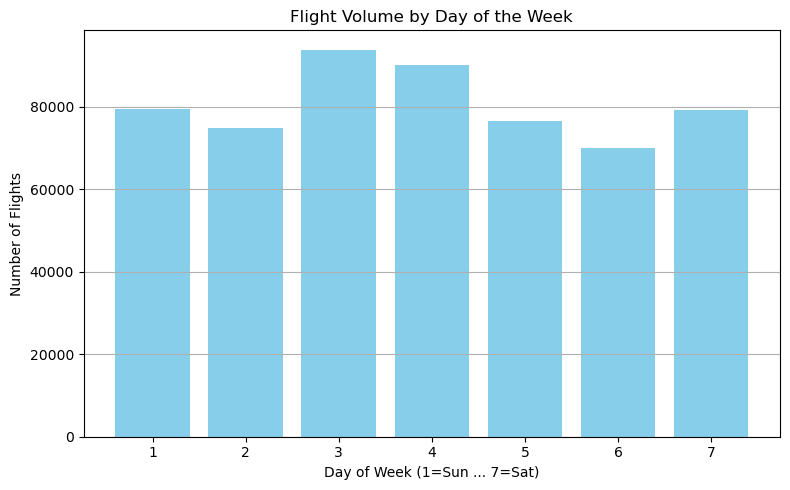

In [99]:
flight_count_by_day = df.groupBy("DayOfWeek").count().orderBy("DayOfWeek").toPandas()

plt.figure(figsize=(8, 5))
plt.bar(flight_count_by_day["DayOfWeek"], flight_count_by_day["count"], color='skyblue')
plt.title("Flight Volume by Day of the Week")
plt.xlabel("Day of Week (1=Sun ... 7=Sat)")
plt.ylabel("Number of Flights")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


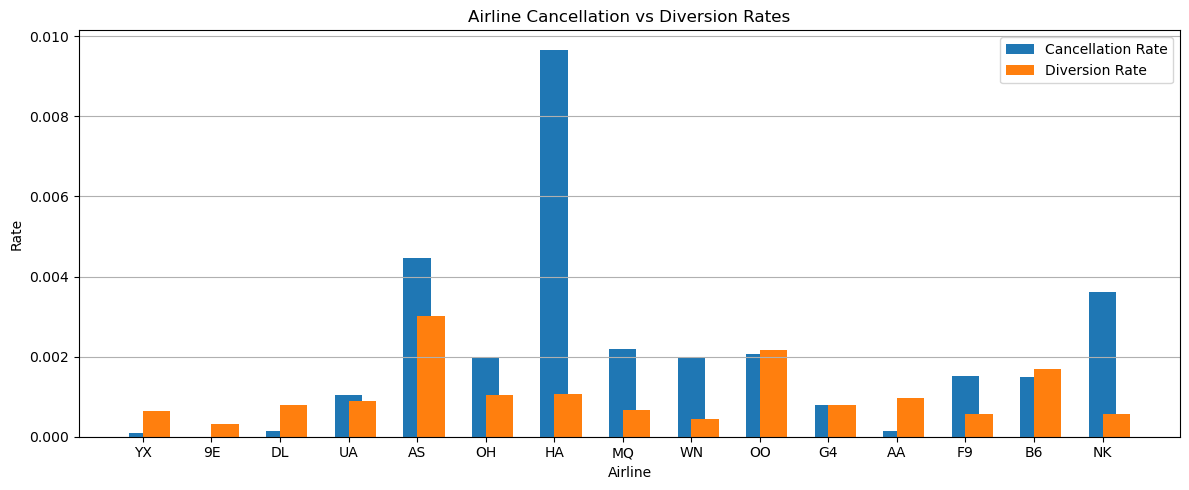

In [103]:
airline_perf_pd = airline_perf.toPandas()

plt.figure(figsize=(12, 5))
x = airline_perf_pd["CARRIER"]
plt.bar(x, airline_perf_pd["Cancellation_Rate"], width=0.4, label='Cancellation Rate', align='center')
plt.bar(x, airline_perf_pd["Diversion_Rate"], width=0.4, label='Diversion Rate', align='edge')
plt.title("Airline Cancellation vs Diversion Rates")
plt.xlabel("Airline")
plt.ylabel("Rate")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()